# Agoda Case

In [4]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Confirm working directory is same as folder location where files are saved
pwd

'C:\\Users\\User\\Desktop\\Agoda Interview 2022\\Case Interview'

# Ingest Data

In [826]:
# Read in given Datasets
cityA = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_A')
cityB = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_B')
cityC = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_C')
cityD = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_D')
cityE = pd.read_excel('Case_Study_Urgency_Message_Data.xlsx',sheet_name='City_E')

In [1074]:
# Create Merged Dataset (All Cities)
datasets = [cityA,cityB,cityC,cityD,cityE]
all_cities = pd.concat(datasets,ignore_index=True)
datasets.append(all_cities)

## Clean Data

In [841]:
#Check for errors and data completeness
def check_data_completeness(df):
    a = "Null values: {}".format(sum(df.isnull().sum()))
    b = "NA values: {}".format(sum(df.isna().sum()))                                 
    c= "Lenght of dataframe: Rows {}, Columns {}".format(len(df),len(df.columns))
    return a,b,c

In [1075]:
for df in datasets:
        print(check_data_completeness(df))

('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 22365, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4932, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 6797, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 10152, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4815, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 49061, Columns 13')


# Create Extra Data

## New Columns in Dataset
- 'days_before_checkin' = Days before customer checked in to accomodation
- 'days_booked'         = No of Days customer stayed in accomodation
- 'total_revenue'       = Total Revenue per Booking

## New Dataset Table
- 'bookings'            = Cumulative Sum of Bookings
- 'percentage'          = Cumulative Percentage of Bookings

In [875]:
def create_extra_data(df):
    df['days_before_checkin'] = (df['checkin_date'] - df['booking_date']).dt.days
    df['days_booked'] = (df['checkout_date'] - df['checkin_date']).dt.days
    df['total_revenue'] = df['ADR_USD']*df['days_booked']
    df.drop(df[df['days_before_checkin']<0].index, inplace = True)
    
    return df


def calc_cum_bookings(df):
    # Group Dataframe by number of days before customer checkin date
    df_cum_bookings = df.groupby('days_before_checkin').count().reset_index()
    # Subselect Segement of Dataframe
    df_cum_bookings = df_cum_bookings[['days_before_checkin','ADR_USD']]
    # Rename Column Headers
    df_cum_bookings.columns = ['days_before_checkin', 'bookings']
    #Calculate Cumulative Bookings
    df_cum_bookings['percentage']=(100*df_cum_bookings['bookings']/df_cum_bookings['bookings'].sum())[::-1].cumsum()
    df = df_cum_bookings
    return df

# Other Updates to possibly add to Code
# - Return no of rows removed/percentage of rows removed

In [869]:
# Format Datasets
for df in datasets:
        create_extra_data(df)

In [870]:
# Check Data Integrity
for df in datasets:
        print(check_data_completeness(df))

('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 22365, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4932, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 6797, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 10152, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 4815, Columns 13')
('Null values: 0', 'NA values: 0', 'Lenght of dataframe: Rows 49061, Columns 13')


In [837]:
#sum(cityA[cityA['days_before_checkin']<0].sum())

In [906]:
# Create new Datasets with cumulative booking data
cityA_cum = calc_cum_bookings(cityA)
cityB_cum = calc_cum_bookings(cityB)
cityC_cum = calc_cum_bookings(cityC)
cityD_cum = calc_cum_bookings(cityD)
cityE_cum = calc_cum_bookings(cityE)
all_cities_cum = calc_cum_bookings(all_cities)


In [909]:
datasets_cum = [cityA_cum,cityB_cum,cityC_cum,cityD_cum,cityE_cum,all_cities_cum]

# 

# Exploratory Data Analysis

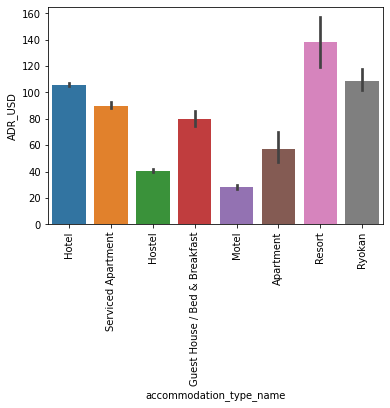

In [916]:
#plt.figure(dpi=200,figsize=(12,4))
sns.barplot(data=cityA,x='accommodation_type_name',y='ADR_USD')

plt.xticks(rotation=90)
plt.show;

## City Statistics

Median Days Booked

In [925]:
all_cities['days_before_checkin'].median()

8.0

In [926]:
# Average ADR
all_cities['ADR_USD'].mean()

148.0930176823937

In [1049]:
all_cities['total_revenue'].sum()

12552312.923595235

## Visualisations

<AxesSubplot:xlabel='days_before_checkin', ylabel='ADR_USD'>

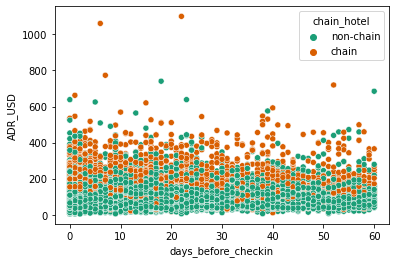

In [1011]:
sns.scatterplot(data=cityA,y=cityA['ADR_USD'],x=(cityA['days_before_checkin']),hue='chain_hotel',palette = 'Dark2')

<AxesSubplot:xlabel='days_before_checkin', ylabel='ADR_USD'>

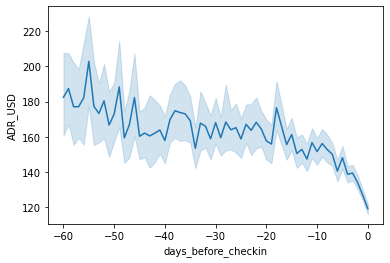

In [954]:
#plt.figure(dpi=200,figsize=(12,4))

#sns.lineplot(data=cityA,x=cityA['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityB,x=cityB['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityC,x=cityC['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityD,x=cityD['days_before_checkin']*(-1),y='ADR_USD')
#sns.lineplot(data=cityE,x=cityE['days_before_checkin']*(-1),y='ADR_USD')
sns.lineplot(data=all_cities,x=all_cities['days_before_checkin']*(-1),y='ADR_USD')

#plt.labels()

In [1012]:
# Group by to calculate mean, same result as lineplot
#xx = all_cities.groupby('days_before_checkin').mean()[::-1][['ADR_USD']]
#xx[:3]

In [1013]:
#plt.figure(figsize=(4,2))
#sns.lineplot(data=xx,x=xx.index*(-1),y='ADR_USD')

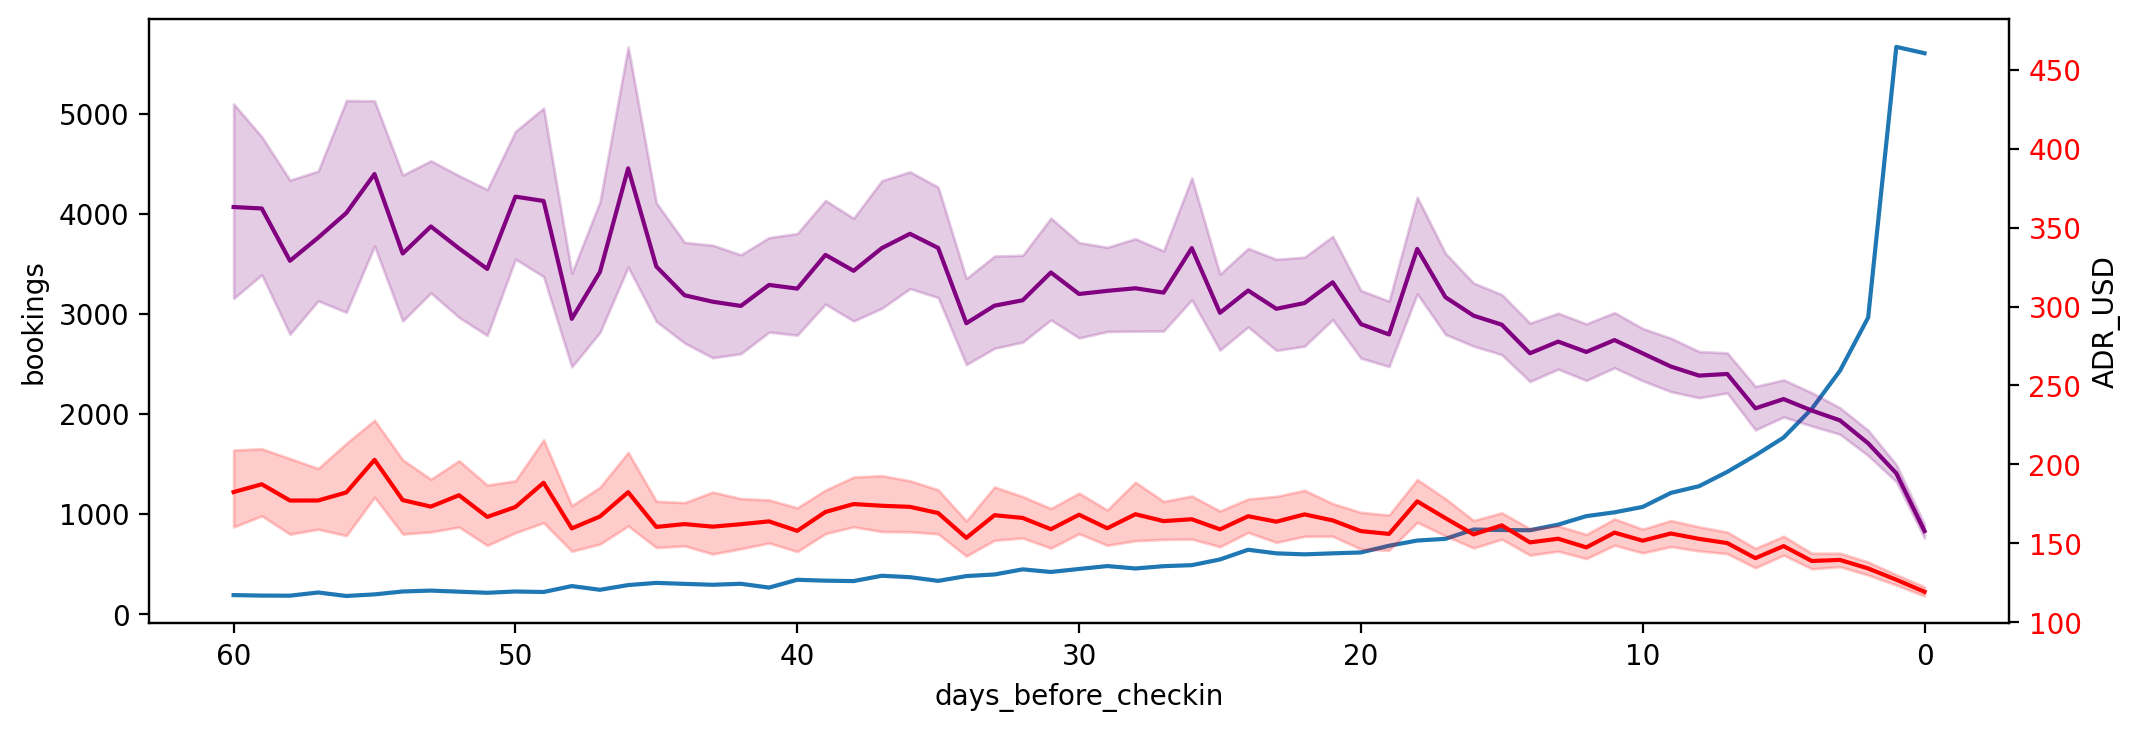

In [1043]:
#plt.figure(dpi=200,figsize=(12,4))
fig, ax = plt.subplots(dpi=200,figsize=(12,4))
ax2 = ax.twinx()

#ax.tick_params(axis='y', labelcolor='red')
ax2.tick_params(axis='y', labelcolor='red')


sns.lineplot(data = all_cities_cum, x= all_cities_cum['days_before_checkin'],y='bookings',ax=ax)
#sns.lineplot(data = cityD_cum, x= cityD_cum['days_before_checkin'],y='percentage',ax=ax2,color='red')
sns.lineplot(data=all_cities,x=all_cities['days_before_checkin'],y='ADR_USD',ax=ax2,color='red')
sns.lineplot(data=all_cities,x=all_cities['days_before_checkin'],y='total_revenue',ax=ax2,color='purple')


plt.gca().invert_xaxis()
plt.show();

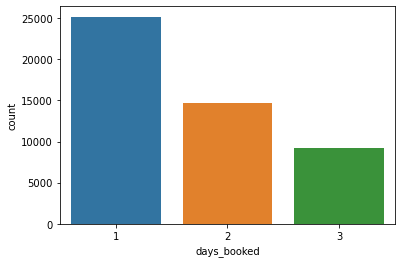

In [1007]:
#plt.figure(dpi=200,figsize=(12,4))
sns.countplot(data=all_cities,x='days_booked')
#plt.xticks(rotation=90)
plt.show;

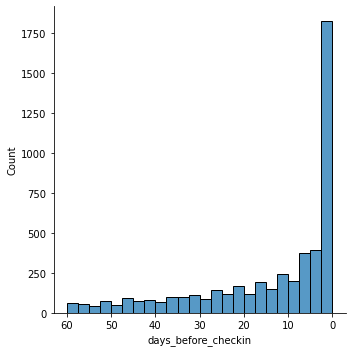

In [1019]:
sns.displot(data=cityB,x='days_before_checkin')
plt.gca().invert_xaxis()

In [ ]:
#DO NOT USE DISTPLOT -deprecated

sns.set(style='darkgrid') #whitegrid, white,dark,tick - high level cmd, set for whole notebook
sns.displot(data=df,x='salary',bins=10,color='red',edgecolor='blue'
           ,lw=1.5,ls='--')

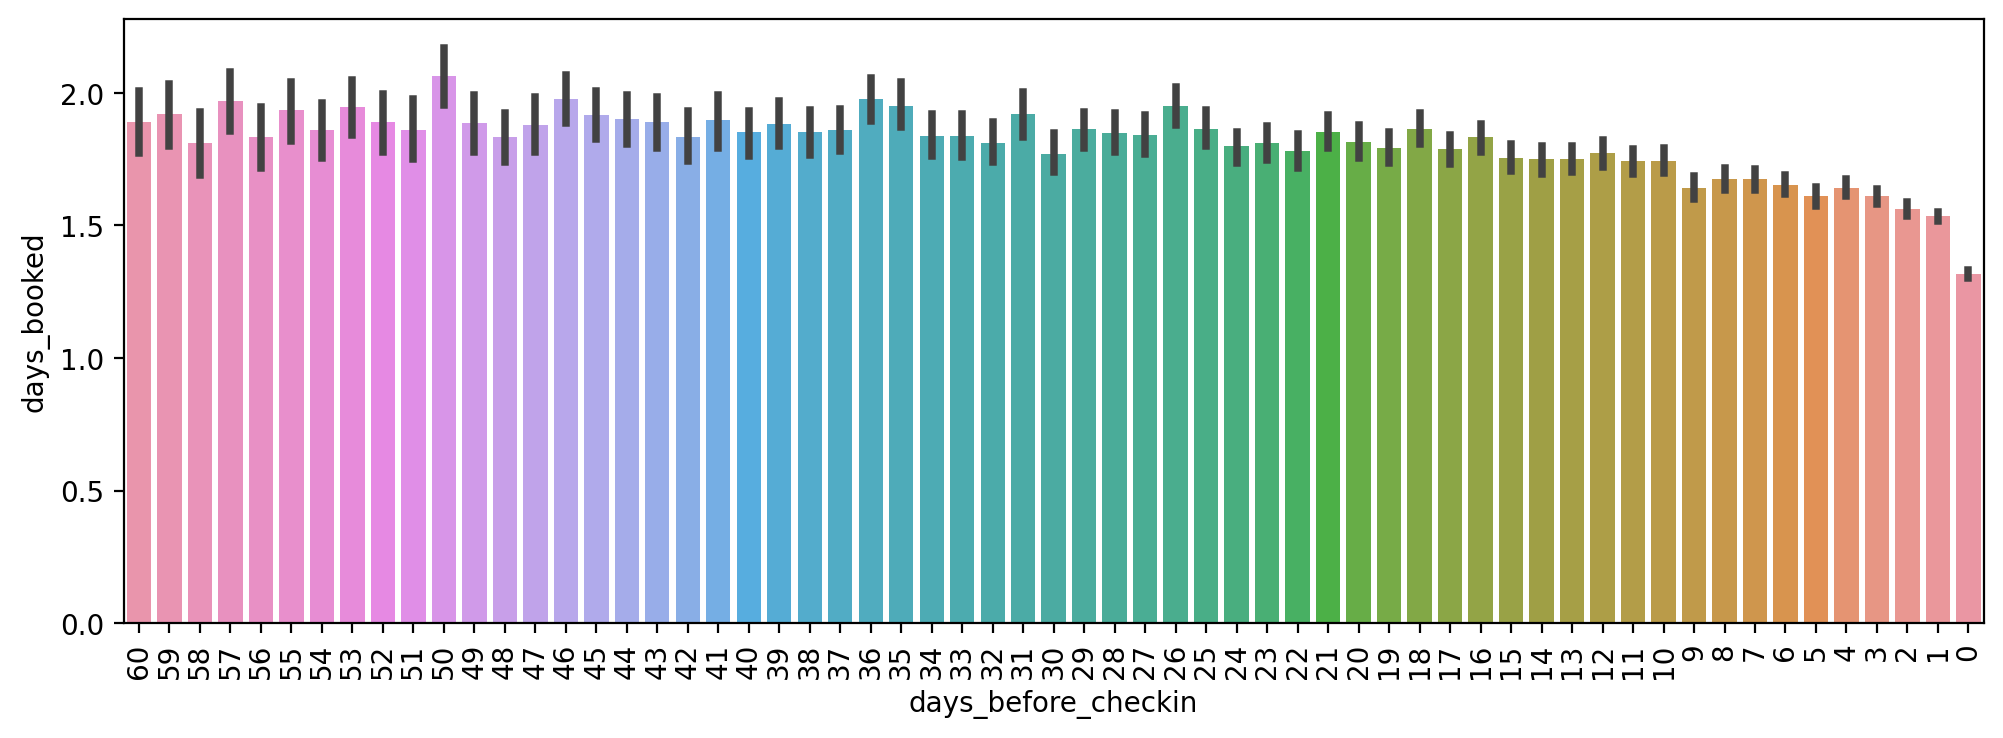

In [1033]:
plt.figure(dpi=200,figsize=(12,4))
sns.barplot(y='days_booked',x='days_before_checkin',data=all_cities)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()
plt.show();

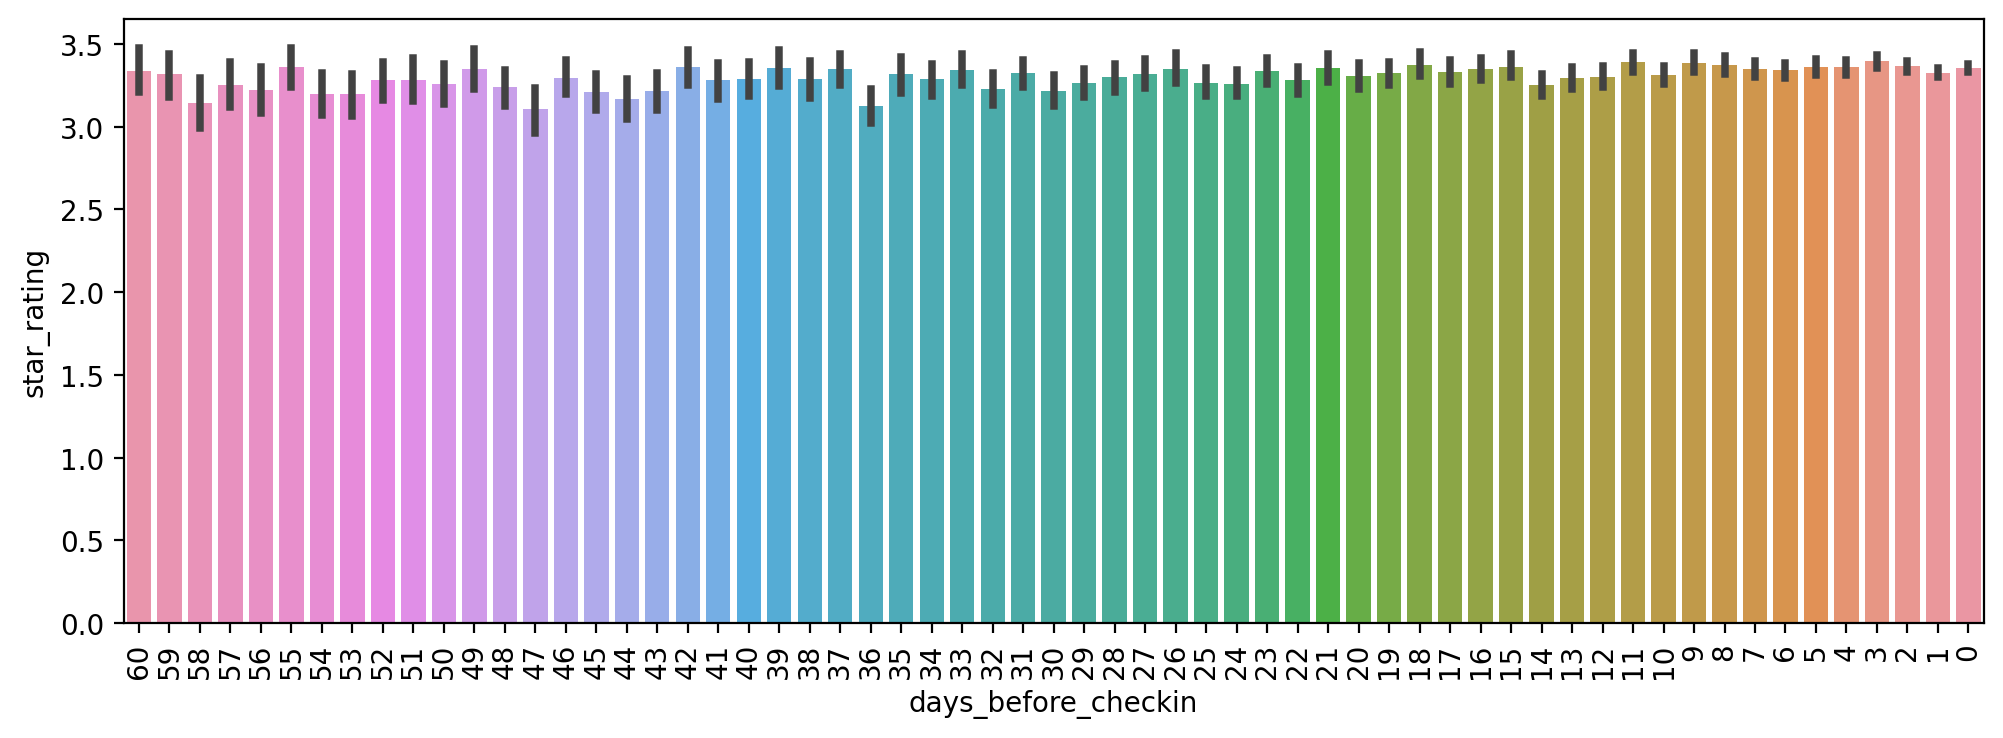

In [1037]:
plt.figure(dpi=200,figsize=(12,4))
sns.barplot(y='star_rating',x='days_before_checkin',data=all_cities)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()
plt.show();

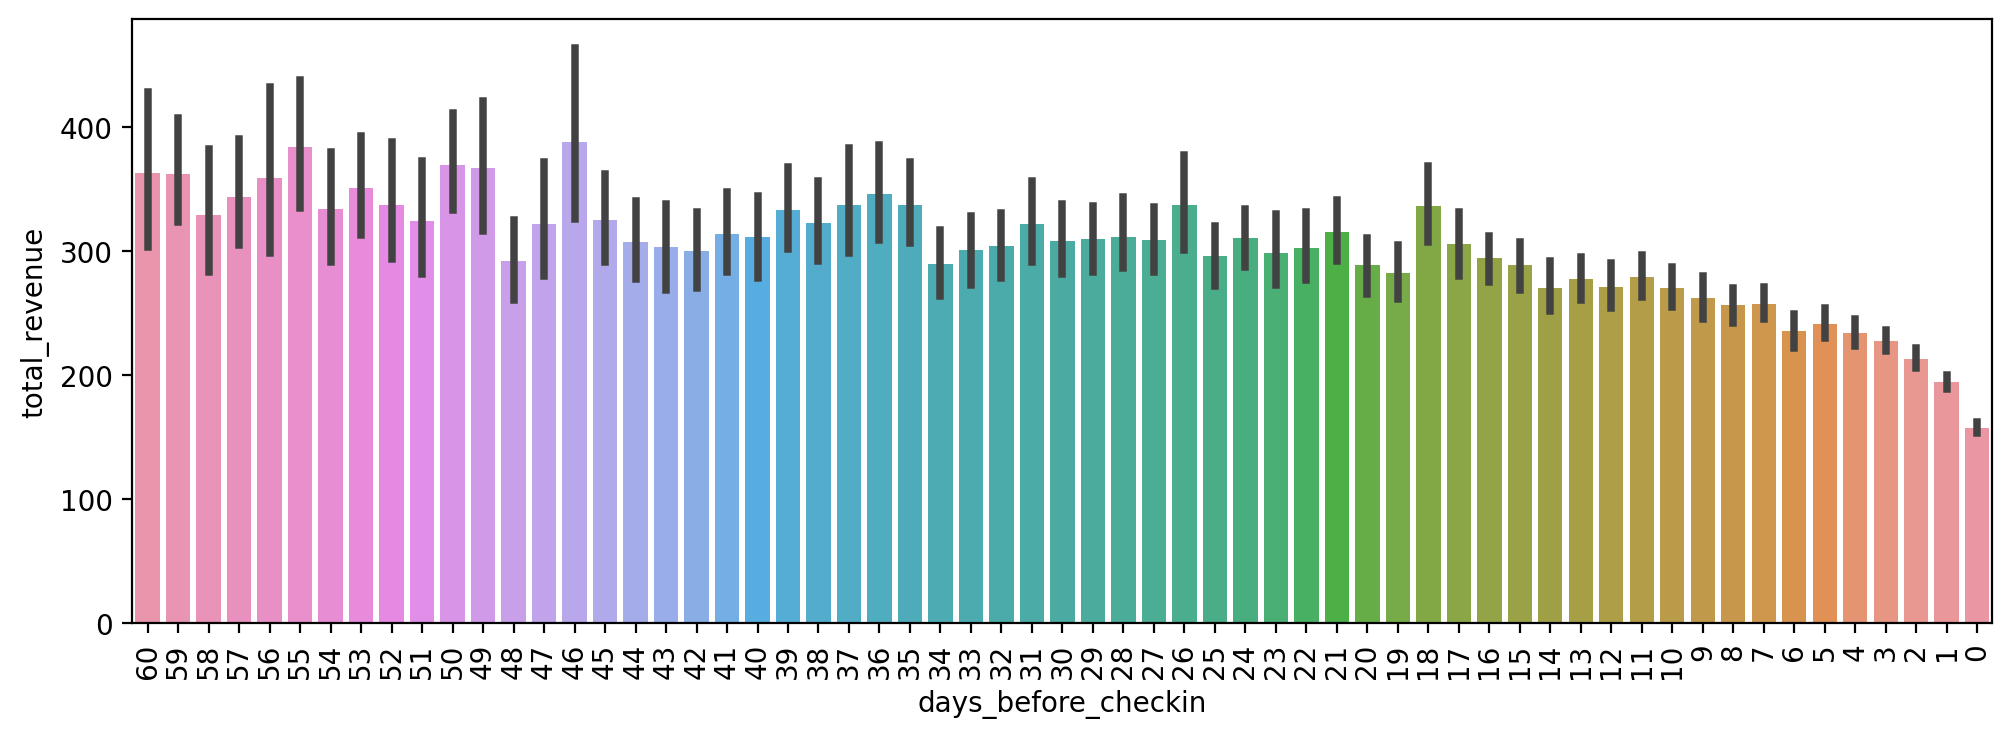

In [1044]:
plt.figure(dpi=200,figsize=(12,4))
sns.barplot(y='total_revenue',x='days_before_checkin',data=all_cities)
plt.xticks(rotation=90)

plt.gca().invert_xaxis()
plt.show();

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

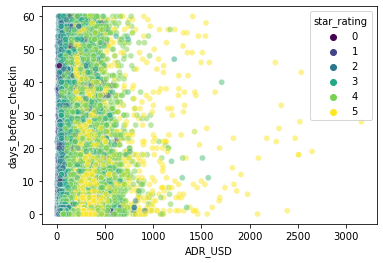

In [1058]:
#plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities,hue='star_rating',
                palette = 'viridis',alpha=0.5)

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

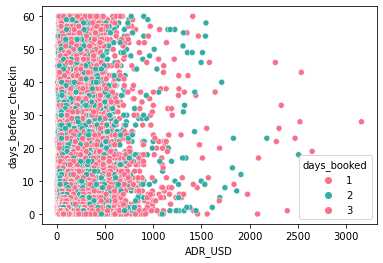

In [1059]:
#plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities,hue='days_booked',
                palette = 'husl')

### Mostly resorts are booked late

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

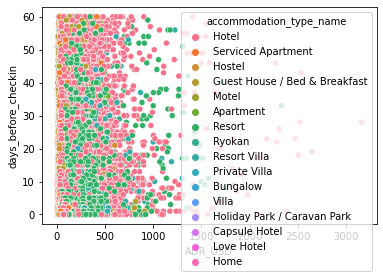

In [1061]:
#plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities,hue='accommodation_type_name',
                palette = 'husl')

In [1062]:
#all_cities['accommodation_type_name'].value_counts()

In [485]:
options = ['Bungalow','Ryokan','Motel','Private Villa','Home','Holiday Park / Caravan Park','Love Hotel','Villa']
#dfall[(dfall['accommodation_type_name'] == 'Bungalow' | 'Motel')]

## WHAT IS THE PERCENTAGE OF DATA I AM REMOVING???????????????????????????????????????????

In [1064]:
#all_cities[~all_cities['accommodation_type_name'].isin(options)]

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

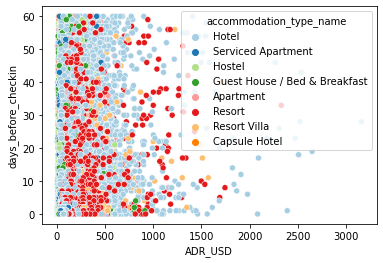

In [1068]:
#plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities[~all_cities['accommodation_type_name'].isin(options)],hue='accommodation_type_name',
                palette = 'Paired')

<AxesSubplot:xlabel='ADR_USD', ylabel='days_before_checkin'>

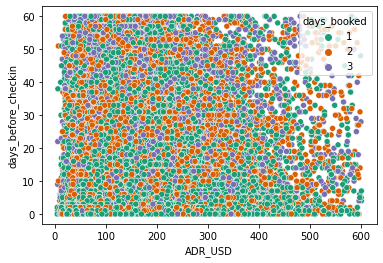

In [1070]:
#plt.figure(dpi=200,figsize=(12,4))
sns.scatterplot(x='ADR_USD',y='days_before_checkin',data=all_cities[all_cities['ADR_USD']<601],hue='days_booked',
                palette = 'Dark2')

### List to crosscheck days_before_checkin looked at against al available criteria
- ADR_USD - relevant
- city_id - not statistically relevant
- hotel_id - ignore
- star_rating - not statistically relevant
- accommodation_type_name - relevant
- chain_hotel - relevant
- booking_date - ignore
- checkin_date - ignore
- checkout_date - ignore
- days_booked - relevant
- total_revenue - relevant


# FINDINGS

# 1 - what percentage of 1 day bookers book last 10 days?

In [1078]:
all_cities[all_cities['days_before_checkin']<11]['days_booked'].value_counts()

1    16040
2     7232
3     3764
Name: days_booked, dtype: int64

## 2 - 40% are yet to book 1 week to check in date

In [1080]:
all_cities_cum['percentage'][:10]

0    100.000000
1     88.579523
2     77.030635
3     70.993253
4     66.040236
5     61.861764
6     58.268278
7     55.037606
8     52.143250
9     49.540368
Name: percentage, dtype: float64

3rd point about revenue?

In [568]:
# ADD calculations revenue

### 4 - Mostly resorts are booked late

# 

In [1035]:
all_cities.head()

,#,ADR_USD,hotel_id,city_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_before_checkin,days_booked,total_revenue
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1,71.06
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1,76.56
2,3,153.88,2313076,9395,5.0,Hotel,chain,2016-08-02,2016-10-01,2016-10-02,60,1,153.88
3,4,126.60,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,1,126.60
4,5,115.08,2240838,9395,3.5,Hotel,non-chain,2016-08-04,2016-10-02,2016-10-03,59,1,115.08


# 

###  Predicting Price

In [580]:
#IMPORT MODELS

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet


from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

#IMPORT PERF METRICS

from sklearn.preprocessing import tests
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report,accuracy_score,plot_confusion_matrix,plot_roc_curve,mean_absolute_error,mean_squared_error

In [589]:
dfall.head(2)

,#,ADR_USD,hotel_id,city_id,star_rating,accommodation_type_name,chain_hotel,booking_date,checkin_date,checkout_date,days_before_checking,days_booked
0,1,71.06,297388,9395,2.5,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1
1,2,76.56,298322,9395,3.0,Hotel,non-chain,2016-08-02,2016-10-01,2016-10-02,60,1


In [596]:
dfallmod= dfall.drop(['chain_hotel','accommodation_type_name','booking_date','checkin_date','checkout_date'],axis=1)#.drop()

X = dfallmod.drop('ADR_USD',axis=1)
y = dfallmod['ADR_USD']

In [612]:
X.head()

,#,hotel_id,city_id,star_rating,days_before_checking,days_booked
0,1,297388,9395,2.5,60,1
1,2,298322,9395,3.0,60,1
2,3,2313076,9395,5.0,60,1
3,4,2240838,9395,3.5,59,1
4,5,2240838,9395,3.5,59,1


In [1092]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [599]:
lmodel = LinearRegression()

In [600]:
lmodel.fit(X_train,y_train)

LinearRegression()

In [1089]:
pd.DataFrame(lmodel.coef_)

,0
0,-0.004314
1,0.000009
2,0.000999
3,53.318683
4,0.493436
5,6.572251


In [601]:
ypreds = lmodel.predict(X_test)

In [602]:
y_test

31393     43.800000
23121     20.100000
25879     77.920000
25547    123.100000
48155    393.220000
            ...    
31390     37.140000
28109     39.340000
20647    159.920000
30804    254.000000
35102    230.633333
Name: ADR_USD, Length: 14720, dtype: float64

In [603]:
mean_absolute_error(ypreds,y_test)

76.27121963417915

In [604]:
np.sqrt(mean_squared_error(ypreds,y_test))

124.5511775024363

In [613]:
y_test.mean()

148.84764887152787

In [ ]:
lmodel.predict([[0.564,0.522,0.894]])

In [609]:
#ypreds = model.predict(X_test)
#print(classification_report(y_test,ypreds))
#print(f'Accuracy score: {100*(accuracy_score(y_test,ypreds))}')
#plot_confusion_matrix(lmodel,X_test,y_test)

In [1094]:
#Logistic regression
from sklearn import preprocessing
from sklearn import utils

#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(trainingScores)

elasmodel = ElasticNet()
elasmodel.fit(X_train,y_train)



ElasticNet()

In [1095]:
ypreds = elasmodel.predict(X_test)

In [1096]:
mean_absolute_error(ypreds,y_test)

76.05437052740935

In [1097]:
np.sqrt(mean_squared_error(ypreds,y_test))

126.11135060581712

In [ ]:
>>> X, y = make_regression(n_features=4, n_informative=2,
...                        random_state=0, shuffle=False)
>>> regr = RandomForestRegressor(max_depth=2, random_state=0)
>>> regr.fit(X, y)
RandomForestRegressor(...)
>>> print(regr.predict([[0, 0, 0, 0]]))
[-8.32987858]

In [1098]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [1106]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(X_train,y_train)


RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [1107]:
ypreds = rf.predict(X_test)

In [1108]:
mean_absolute_error(ypreds,y_test)

50.19394400346817

In [1109]:
np.sqrt(mean_squared_error(ypreds,y_test))

85.97941341334099

In [ ]:
{'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}
# Create and train model
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(x_train, y_train)
# Predict on test data
prediction = rf.predict(x_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
# Print results
print(mse)
print(mse^.5)

In [ ]:
# PARAMETER SETUP

n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True]
oob_score = [True,False]

param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

rfc = RandomForestClassifier()
grid = GridSearchCV(rfc,param_grid)

In [ ]:
# TRAIN

grid.fit(X_train,y_train)

In [ ]:
# PREDICT

grid.predict(X_test)
ypreds = grid.predict(X_test)
print(classification_report(y_test,ypreds))
print(f'Accuracy score: {100*(accuracy_score(y_test,ypreds))}')
plot_confusion_matrix(grid,X_test,y_test)

# Using all data in datasets

In [1119]:
all_citiesx = all_cities.drop(['booking_date','checkin_date','checkout_date'],axis=1)#.drop()



In [1120]:
all_citiesx.head()

,#,ADR_USD,hotel_id,city_id,star_rating,accommodation_type_name,chain_hotel,days_before_checkin,days_booked,total_revenue
0,1,71.06,297388,9395,2.5,Hotel,non-chain,60,1,71.06
1,2,76.56,298322,9395,3.0,Hotel,non-chain,60,1,76.56
2,3,153.88,2313076,9395,5.0,Hotel,chain,60,1,153.88
3,4,126.60,2240838,9395,3.5,Hotel,non-chain,59,1,126.60
4,5,115.08,2240838,9395,3.5,Hotel,non-chain,59,1,115.08


In [1123]:
# using .get_dummies function to convert
# the categorical datatype to numerical
# and storing the returned dataFrame
# in a new variable df1
df1 = pd.get_dummies(all_citiesx['accommodation_type_name'])
 
# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
all_citiesx = pd.concat([all_citiesx, df1], axis=1).reindex(df.index)
 
# removing the column 'Purchased' from df
# as it is of no use now.
all_citiesx.drop('accommodation_type_name', axis=1, inplace=True)


In [1125]:
df1 = pd.get_dummies(all_citiesx['chain_hotel'])
 
# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
all_citiesx = pd.concat([all_citiesx, df1], axis=1).reindex(df.index)
 
# removing the column 'Purchased' from df
# as it is of no use now.
all_citiesx.drop('chain_hotel', axis=1, inplace=True)

In [1126]:
 
# printing df
all_citiesx

,#,ADR_USD,hotel_id,city_id,star_rating,days_before_checkin,days_booked,total_revenue,Apartment,Bungalow,...,Love Hotel,Motel,Private Villa,Resort,Resort Villa,Ryokan,Serviced Apartment,Villa,chain,non-chain
0,1,71.060000,297388,9395,2.5,60,1,71.06,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,76.560000,298322,9395,3.0,60,1,76.56,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,153.880000,2313076,9395,5.0,60,1,153.88,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,126.600000,2240838,9395,3.5,59,1,126.60,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,115.080000,2240838,9395,3.5,59,1,115.08,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49056,4813,72.580000,130890,8584,4.0,0,2,145.16,0,0,...,0,0,0,0,0,0,0,0,0,1
49057,4814,70.020000,130890,8584,4.0,0,1,70.02,0,0,...,0,0,0,0,0,0,0,0,0,1
49058,4815,921.260000,21720,8584,5.0,0,1,921.26,0,0,...,0,0,0,1,0,0,0,0,0,1
49059,4816,345.086667,21720,8584,5.0,0,3,1035.26,0,0,...,0,0,0,1,0,0,0,0,0,1


In [1127]:
X = all_citiesx.drop('ADR_USD',axis=1)
y = all_citiesx['ADR_USD']

In [1128]:
X.head()

,#,hotel_id,city_id,star_rating,days_before_checkin,days_booked,total_revenue,Apartment,Bungalow,Capsule Hotel,...,Love Hotel,Motel,Private Villa,Resort,Resort Villa,Ryokan,Serviced Apartment,Villa,chain,non-chain
0,1,297388,9395,2.5,60,1,71.06,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,298322,9395,3.0,60,1,76.56,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,2313076,9395,5.0,60,1,153.88,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4,2240838,9395,3.5,59,1,126.60,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,2240838,9395,3.5,59,1,115.08,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [1130]:
y.head()

0     71.06
1     76.56
2    153.88
3    126.60
4    115.08
Name: ADR_USD, dtype: float64

In [1135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [1136]:
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 7, random_state = 18)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=300,
                      random_state=18)

In [1137]:
ypreds = rf.predict(X_test)

In [1138]:
mean_absolute_error(ypreds,y_test)

33.17105896767553

In [1139]:
np.sqrt(mean_squared_error(ypreds,y_test))

54.110281697730855

In [1141]:
pd.DataFrame(rf.feature_importances_)

,0
0,3.400744e-02
1,8.974100e-02
2,8.714000e-02
3,1.410286e-01
4,1.077375e-02
5,5.406109e-02
6,5.110929e-01
7,4.464685e-04
8,2.002934e-05
9,1.706000e-03
